# Deep Learning Project


## Problèmatique:
The aim of this project is to take images of flowers in input and to define the name of the flower using a trained model

## Flowers Classification
- Flowers dataset with 5 types of flowers.
- Dataset : https://www.kaggle.com/imsparsh/flowers-dataset?select=train


**Le contexte**

Vous êtes un data scientist pour un client (fictif ou non) et vous devez présenter une analyse de données complètes, de la spécification des besoins, élaboration d’une problématique pertinente ainsi qu’une mise en oeuvre technique d’un modele de deep learning respectant les conditions ci-dessous. 

**Le livrable**
Jupyter notebook avec les datas (ou liens drive/kaggle/autre pour accéder aux datas si > 5Mo)
le travail devra être déposé sur un repo git et l’étudiant devra envoyer le lien par mail ou messagerie slack 

**Contraintes**
- Exposer concrètement votre problématique / question à définir : quel est le but de votre modèle et à quelle situation métier peut il correspondre 
- Ne pas choisir 2 fois les meme données dans la classe (@canal => tenir un gsheet avec les sujet de chacun)
- Un maximum de commentaires dans votre code
- Texte type Markdown après chaque cellule pertinente 
- Tous les graphiques doivent être lisible (taille du graphique, infos représenté), si diagramme pas lisible, en faire une version filtrée dessous

**Partie 1 : Analyse des données choisies (EDA)**
- Diagrammes de répartition des données (dire si elles sont équilibrées et ce que ca implique)
- Feature engineering : nettoyage, augmentation, gestion des valeurs manquantes, encodage … 
- Explication de votre travail avec vos terme (merci de ne pas me copier coller directement des choses que vous ne comprenez pas d’internet)

**Partie 2: Model Building**
- Utiliser un réseaux de neurone (le choix dépends de vous et votre problematique)
- Choix et affichage des metrics 
- Explication de votre methode de sélection du meilleur paramétrage pour votre algorithme
- Le model est-il en overfitting/underfitting/OK ?
- Donner des preuves pour répondre à la question ci-dessus

**Partie 3 : API, Conteneurisation et déploiement** 
Deploiement de votre modele avec une des librairies suivantes: 
- Fastapi
- Flask 
- Streamlit 
- ou autre type bouton Jupiter 
- Livraison sur git avec documentation, tests et README qui résume votre projet  
- Faire une vidéo de moins de 10min en présentant votre sujet 
- (bonus) faire un paquetage Docker de votre application

--------------------------------------------------------------------------------

In [32]:
## Installation des dépendances pour installer FastAI
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

OSError: ignored

In [43]:
## Importation des librairies de FastAI
from fastbook import *
from fastai.vision.widgets import *

In [80]:
# Chemin d'accès aux données
from google.colab import drive
drive.mount('/content/drive')
flower_train_path = '/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Récupération des images
rcp_img = get_image_files(flower_train_path)
rcp_img


(#2746) [Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10172567486_2748826a8b.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10172636503_21bededa75_n.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10140303196_b88d3d6cec.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10172379554_b296050f82_n.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10555826524_423eb8bf71_n.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10466290366_cc72e33532.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10993710036_2033222c91.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10559679065_50d2b16f6d.jpg'),Path('/content/drive/MyDrive/Colab_Notebooks/ProjetDeepLearning/train/daisy/10555749515_13a12a026e.jpg'),Path('/content/drive/MyDrive/Colab_Noteb

In [58]:
# Number of images for train and test
N_train = 500
N_test = 200
# Image size
img_width = 200
img_height = 200
epochs=10
batch_size=10

In [59]:
# Initialisation de la liste des types de fleurs possibles détectables
# flowers = ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [82]:
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label)

In [84]:
dl = flowers.dataloaders(flower_train_path) # Creation du dataloaders

### Data Augmentation

In [87]:
# Data augmentation sur les images pour avoir une taille identique
flowers = flowers.new(
    item_tfms=RandomResizedCrop(200, min_scale=0.5),
    batch_tfms=aug_transforms())
dl = flowers.dataloaders(flower_train_path)

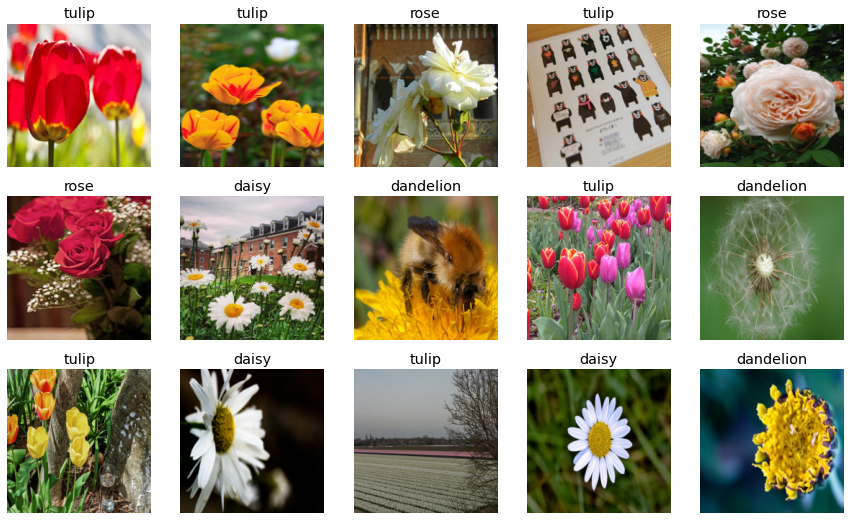

In [88]:
# Affichage des images (10 images en 2 lignes)
dl.valid.show_batch(max_n=15, nrows=3) 

### Train Model

In [ ]:
# Entrainement du modèle avec les images
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

### Exportation datas

### Model testing

In [19]:
# Create upload button
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [79]:
# Upload image to test 
img = PILImage.create(btn_upload.data[-1])


IndexError: ignored

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(150,150))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
# Prediction score
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred